# Capstone Project: Electromobility Data Analysis

## 1. Introduction and Objective

Climate change is one of the greatest threats of the 21st century. It creates a risk for the natural environment as well as for human society. Climate change is associated with more frequent weather extremes, water and food shortages and the loss of ecosystems.  The largest driving force for climate change are greenhouse gas (GHG) emissions. Since 1850, the anthropogenic GHG emissions increased due to economic and population growth. The main source of anthro-pogenic GHG emissions are the combustion of fossil fuels for energy production. [1]
The energy policy of the European Union aims to reduce GHG emission by at least 55 % by 2030 from 1990 levels. The Paris Agreement aims to limit the global warming to under 2 °C and pursues efforts to limit it to 1.5 °C. In 2020, road transport contributed to 24% of the EU's total emissions of carbon dioxide (CO2), the main greenhouse gas. The highest proportion of the transport emissions 631 % in 2208) can be traced back tolight duty vehicles, like cars and vanst. In comparison to other sectors, the transport sector has not shown the same decrease of GHG emissions since 1990. Therefore, the deployment of low-emission alternative energy needs to be raised in the transport sector  The furtherspreadt of electromobility can play a crucial role for the reduction of GHG emissions if the electrical power is generated by renewable energy sources .[1,2]

This project focuses on the trade and distribution of electric vehicles worldwide in recent years. The following questions are to be answered.


**Analysis Questions**:
1. How are EV sales and stock distributed across different powertrain types (BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle) worldwide?
2. How are EV sales and stock distributed across different modes (Cars, Buses, Vans, Trucks) worldwide?
3. How are EV Cars sales and stock (BEV and PHEV) distributed across countries in 2023 and over the last years?
4. How did the EV Car stock develop since 2010 for different regions?
5. How do Charging points, EV stock and EV Sales correlate?

## 2. Data Cleaning and Preparation

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pymysql
import statsmodels.api as sm 

In [84]:
electromobility_df=pd.read_csv('IEA Global EV Data 2024.csv') # Source: [3] 

**Data dictionary**:

|column name|content of column| values|
|--------|-------|-------|
|region|country, region or global| individual coountries, Regions (EU27, Europe (Europe includes the EU27, Norway, Iceland, Switzerland and United Kingdom), Rest of the world) or World|
|category|historical data or forecasts| Historical, Projection-STEPS (Stated Policies Scenario), Projection-APS (Announced Pledges Scenario)|
|parameter|parameter of the value |EV stock (EVs on the road), EV stock share, EV sales (New Electric car registration), EV sales share, EV charging points|
|mode|differentation of vehicle types|Cars, EV (electric vehicles), Buses, Vans, Trucks|
|powertrain|differentation of powertrain types |EV (electric vehicle), BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle)|
|year|historical years and forecast|historical (2010-2023), forecast for 2025, 2030 and 2035|
|unit|Definition of the unit of the value column|percent, number of vehicles, number of charging points|
|value|values of the corresponding parameter||ues 

In [86]:
electromobility_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [87]:
#12654 rows without any missing values
electromobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [88]:
# Check for missing data: the data set is complete
electromobility_df.isnull().any().sum()

0

In [89]:
# check for diplicates: there are no duplicates
electromobility_df.duplicated().any()

False

In [90]:
# Check the different parameters to which the values relate
electromobility_df.parameter.unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [91]:
# Splitting the DataFrame 'electromobility_df' into one DataFrame for each relevant parameter

# Create DataFrame for EV Sales
EV_sales=electromobility_df[electromobility_df['parameter']=='EV sales']
EV_sales=EV_sales.drop('parameter', axis=1)
EV_sales=EV_sales.drop('unit', axis=1)
EV_sales=EV_sales.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Sales Share
EV_sales_share=electromobility_df[electromobility_df['parameter']=='EV sales share']
EV_sales_share=EV_sales_share.drop('parameter', axis=1)
EV_sales_share=EV_sales_share.drop('unit', axis=1)
EV_sales_share=EV_sales_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Stock
EV_stock=electromobility_df[electromobility_df['parameter']=='EV stock']
EV_stock=EV_stock.drop('parameter', axis=1)
EV_stock=EV_stock.drop('unit', axis=1)
EV_stock=EV_stock.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Stock Share
EV_stock_share=electromobility_df[electromobility_df['parameter']=='EV stock share']
EV_stock_share=EV_stock_share.drop('parameter', axis=1)
EV_stock_share=EV_stock_share.drop('unit', axis=1)
EV_stock_share=EV_stock_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Charging Points
EV_charging_points=electromobility_df[electromobility_df['parameter']=='EV charging points']
EV_charging_points=EV_charging_points.drop('parameter', axis=1)
EV_charging_points=EV_charging_points.drop('unit', axis=1)
EV_charging_points=EV_charging_points.rename(columns={"value": "number of charging points"})

In [92]:
EV_sales.head()

,region,category,mode,powertrain,year,number of vehicles
2,Australia,Historical,Cars,BEV,2011,49.0
5,Australia,Historical,Cars,BEV,2012,170.0
9,Australia,Historical,Cars,PHEV,2012,80.0
10,Australia,Historical,Cars,PHEV,2013,100.0
14,Australia,Historical,Cars,BEV,2013,190.0


**Using MySQL as Database**

In [94]:
# Export as csv file, then import it into the MySQL database 'electromobility_db'

# EV_sales.to_csv('EV_sales.csv')
# EV_sales_share.to_csv('EV_sales_share.csv')
# EV_stock.to_csv('EV_stock.csv')
# EV_stock_share.to_csv('EV_stock_share.csv')

In [95]:
# MySQL Workbench:

![Picture of MySQL Database electromobility_db](electromobility_db.png "electromobility_db")

In [97]:
# Connecting to the MySQL database 'electromobility_db'
# conn=pymysql.connect(host='localhost', port=int(3306), user='root', passwd='*********', db='electromobility_db')

In [98]:
# Calling the table EV_sales from MYSQL for chapter 3.1
# EV_sales_h_gl=pd.read_sql_query('SELECT * FROM ev_sales WHERE EV_sales_category="Historical" AND EV_sales_region="World"', conn)

## 3. Explorative Data Analysis

**3.1 Distribution of EV Sales and Stock of Different Powertrain Types**

In [101]:
# Focus on global and historical EV Sales
EV_sales_h_gl=EV_sales[(EV_sales['category']=='Historical')  & (EV_sales['region']=='World')] 
EV_sales_share_h_gl=EV_sales_share[(EV_sales_share['category']=='Historical')  & (EV_sales_share['region']=='World')]
EV_stock_h_gl=EV_stock[(EV_stock['category']=='Historical')  & (EV_stock['region']=='World')]
EV_stock_share_h_gl=EV_stock_share[(EV_stock_share['category']=='Historical')  & (EV_stock_share['region']=='World')]

In [102]:
EV_stock_h_gl

,region,category,mode,powertrain,year,number of vehicles
11409,World,Historical,Vans,BEV,2010,7100.0
11411,World,Historical,Vans,FCEV,2010,6.0
11412,World,Historical,Vans,PHEV,2010,210.0
11413,World,Historical,Cars,FCEV,2010,45.0
11416,World,Historical,Cars,BEV,2010,20000.0
...,...,...,...,...,...,...
12354,World,Historical,Cars,BEV,2023,28000000.0
12358,World,Historical,Vans,PHEV,2023,15000.0
12359,World,Historical,Vans,FCEV,2023,3200.0
12361,World,Historical,Vans,BEV,2023,1300000.0


In [103]:
# Create Pivot table for differentiation of powertrains for EV Sales and EV Stock
EV_sales_h_gl_powertrain_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_gl_powertrain_pivot =EV_sales_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()

EV_stock_h_gl_powertrain_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_h_gl_powertrain_pivot =EV_stock_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()
EV_stock_h_gl_powertrain_pivot.tail()

powertrain,BEV,PHEV,FCEV
year,,,
2019,5830000.0,2439888.0,24070.0
2020,7970000.0,3443110.0,33600.0
2021,12390000.0,5345450.0,51760.0
2022,19770000.0,8049920.0,72000.0
2023,30280000.0,12055300.0,88900.0


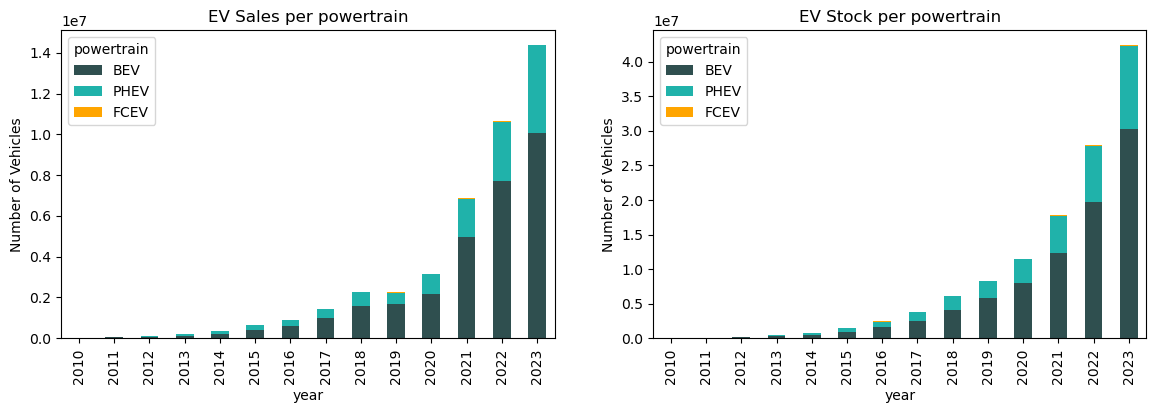

In [104]:
fig, ax= plt.subplots (1,2, figsize=(14,4))
EV_sales_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[0], stacked=True, color=['darkslategrey', 'lightseagreen', 'orange'])
ax[0].set_title('EV Sales per powertrain')
ax[0].set_ylabel('Number of Vehicles')
EV_stock_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[1], stacked=True, color=['darkslategrey', 'lightseagreen', 'orange'])
ax[1].set_title('EV Stock per powertrain')
ax[1].set_ylabel('Number of Vehicles')
plt.show()

The Sales of EVs have been growing steadily and even more so since 2020. Around 14 million EVs were sold in 2023, resulting in an EV stock of around 43 million. Fully electric vehicles are the most popular, followed by plug-in hybrid electric vehicle. A plug-in hybrid is a motor vehicle with a hybrid drive whose drive battery can be charged both via a combustion engine and via a plug into the power grid, which makes it less dependent on charging infrastructure. However, PHEVs offer few climate or air quality benefits, because there is no guarantee that they will be driven electrically. [4] Fuel cell electric vehicles (FCEVs) are powered by hydrogen. FCEVS play a minor role, as they are still at the research stage and there is a lack of refuelling infrastructure. [5] 
The Development of BEV and PHEV Sales is promising as it is needed to meet the CO2 reduction goals.

**3.2 Distribution of EV Sales and Stock of Different Modes**

In [107]:
# Create Pivot table for differentiation of modes
EV_sales_h_gl_mode_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_sales_h_gl_mode_pivot = EV_sales_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()

EV_stock_h_gl_mode_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_stock_h_gl_mode_pivot = EV_stock_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()
EV_stock_h_gl_mode_pivot.head()

mode,Cars,Trucks,Buses,Vans
year,,,,
2010,20445.0,1100.0,8506.0,7316.0
2011,67583.0,1300.0,11160.0,10266.0
2012,190110.0,1600.0,12680.0,21317.0
2013,390140.0,2400.0,15412.0,31426.0
2014,710210.0,2600.0,35561.0,43549.0


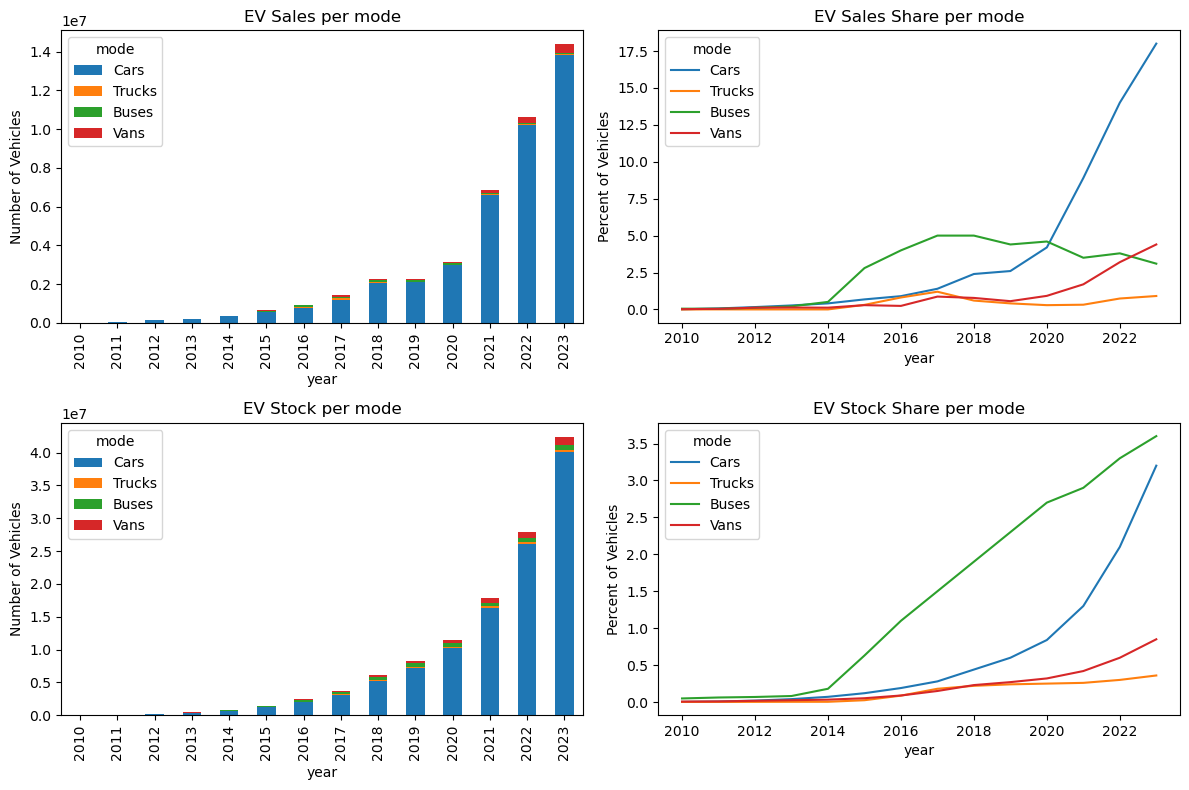

In [108]:
fig, ax= plt.subplots (2,2, figsize=(12,8))
EV_sales_h_gl_mode_pivot.plot(kind='bar',ax=ax[0,0], stacked=True)
ax[0,0].set_title('EV Sales per mode')
ax[0,0].set_ylabel('Number of Vehicles')
sns.lineplot(data=EV_sales_share_h_gl, ax=ax[0,1], x='year', y='percent of vehicles', hue='mode')
ax[0,1].set_title('EV Sales Share per mode')
ax[0,1].set_ylabel('Percent of Vehicles')
EV_stock_h_gl_mode_pivot.plot(kind='bar',ax=ax[1,0], stacked=True)
ax[1,0].set_title('EV Stock per mode')
ax[1,0].set_ylabel('Number of Vehicles')
sns.lineplot(data=EV_stock_share_h_gl, ax=ax[1,1], x='year', y='percent of vehicles', hue='mode')
ax[1,1].set_title('EV Stock Share per mode')
ax[1,1].set_ylabel('Percent of Vehicles')
plt.tight_layout()
plt.show()

In terms of numbers, EV sales are dominated by passenger cars, with commercial vehicles such as vans, buses and trucks playing a minor role. This is to be expected, as passenger cars account for the largest share of the global vehicle market. [6] The sales share of cars has increased the most. The share of sales accounted for by buses has increased. However, it has stagnated or slightly decreased since 2016.  Vans have increased slightly since 2020. Electrification of commercial vehicles seems to be less attractive. This raises the question of why it is not attractive enough. It could be that the range is not enough, or the infrastructure is not good enough, or other needs are not being met. [7]
Buses still have the highest share Green public transport is important to fight climate change. Differences in absolute numbers are due to the fact that fewer buses are needed than cars.

In [110]:
# EV stock in 2023
EV_stock_2023=EV_stock_h_gl[EV_stock_h_gl['year']==2023]
EV_stock_2023_mode_pivot = EV_stock_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_2023_mode_pivot_transposed=EV_stock_2023_mode_pivot[['mode', 'BEV', 'FCEV', 'PHEV']].set_index('mode').transpose()
EV_stock_2023_mode_pivot_transposed

mode,Buses,Cars,Trucks,Vans
powertrain,,,,
BEV,650000.0,28000000.0,330000.0,1300000.0
FCEV,8700.0,66000.0,11000.0,3200.0
PHEV,39000.0,12000000.0,1300.0,15000.0


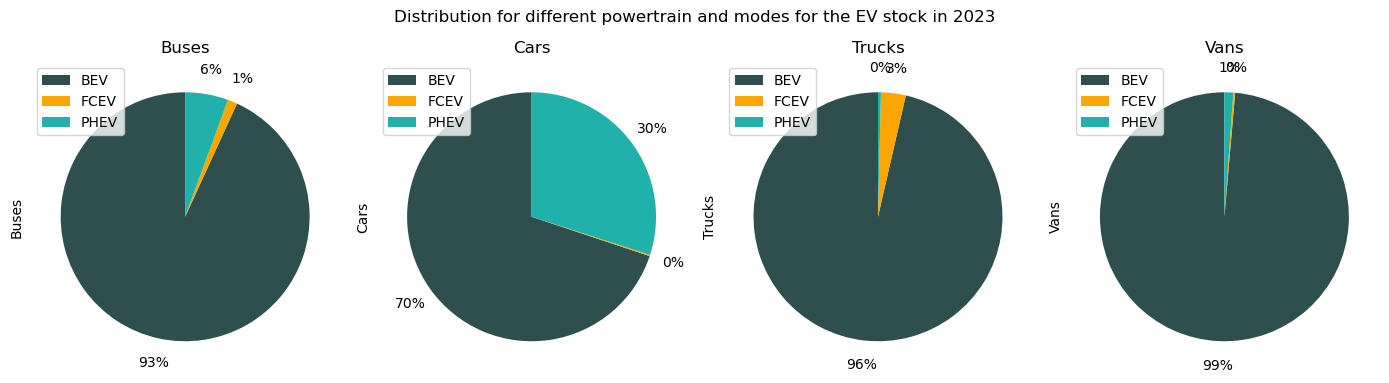

In [111]:
# Distribution for different powertrain and modes for the EV Stock in 2023
fig, ax= plt.subplots (1,4, figsize=(14,4))
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[0], y='Buses', startangle=90, labels=None, autopct='%1.0f%%', pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[0].set_title('Buses')
ax[0].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[1], y='Cars', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[1].set_title('Cars')
ax[1].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[2], y='Trucks', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[2].set_title('Trucks')
ax[2].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[3], y='Vans', startangle=90, labels=None, autopct='%1.f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[3].set_title('Vans')
ax[3].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
fig.suptitle ('Distribution for different powertrain and modes for the EV stock in 2023')
plt.tight_layout()
plt.show()

Plug-in Hybrid Electric Vehicles (PHEVs) play a significant role primarily in the passenger car segment. They have a minor presence in commercial vehicles such as buses, trucks, and vans. It could be, that the lower demand for commercial EVs results in a limited variety of models and powertrain options. Another possible cause are the influence of subsidies. This needs further investigation. FCEV plays no significnat role for all modes. [4, 7]

**3.3 Distribution of sales and stock of EV Cars to different countries in the last year.**

In this chapter the focus will be on BEV & PHEV Cars only, because FCEV plays a subordinate role.

In [115]:
# Create DataFrame with Columns of each parameter (EV stock, EV sales,..) and powertrain (BEV and PHEV) for BEV & PHEV Cars
EV_cars_h_sales_stock=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['mode']=='Cars') & (electromobility_df['powertrain']!='FCEV') & ((electromobility_df['parameter']=='EV stock share') | (electromobility_df['parameter']=='EV sales share') | (electromobility_df['parameter']=='EV sales') | (electromobility_df['parameter']=='EV stock'))]

# Pivottable for historical EV Car stock and EV Car sales
EV_cars_h = EV_cars_h_sales_stock.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_cars_h.columns = ["_".join(pair) for pair in EV_cars_h.columns]
EV_cars_h=EV_cars_h.drop(columns='category_')
EV_cars_h=EV_cars_h.drop(columns='mode_')
EV_cars_h=EV_cars_h.rename(columns= {'year_': 'year', 'region_':'region'})
EV_cars_h.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
0,Australia,2011,49.0,NaN,0.0065,49.0,NaN,0.00039
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240
2,Australia,2013,190.0,100.0,0.0340,410.0,180.0,0.00460
3,Australia,2014,370.0,950.0,0.1600,780.0,1100.0,0.01400
4,Australia,2015,760.0,1000.0,0.2000,1500.0,2100.0,0.02700


In [116]:
# a lot of missing values, focus on Sales and stock
EV_cars_h.isnull().sum()

region                 0
year                   0
EV sales_BEV           8
EV sales_PHEV        100
EV sales share_EV      9
EV stock_BEV         138
EV stock_PHEV        202
EV stock share_EV    147
dtype: int64

In [117]:
# no data for some countries in some years
EV_cars_h.groupby('year')['region'].count()

year
2010    25
2011    32
2012    33
2013    35
2014    35
2015    47
2016    48
2017    48
2018    49
2019    52
2020    52
2021    52
2022    52
2023    52
Name: region, dtype: int64

In [118]:
EV_cars_h.groupby('year')[['EV sales share_EV','EV sales_BEV','EV sales_PHEV','EV sales share_EV','EV stock_BEV', 'EV stock_PHEV']].apply(lambda x: x.isnull().sum())

,EV sales share_EV,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV
year,,,,,,
2010,4,4,17,4,2,16
2011,2,2,15,2,2,15
2012,1,1,7,1,3,9
2013,0,1,7,0,2,9
2014,0,0,6,0,1,7
2015,0,0,9,0,11,15
2016,0,0,8,0,12,15
2017,0,0,7,0,12,15
2018,1,0,6,1,13,16


In [119]:
EV_cars_h[EV_cars_h['region']=='Latvia']

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
346,Latvia,2015,17.0,9.0,0.19,NaN,NaN,NaN
347,Latvia,2016,22.0,18.0,0.24,NaN,NaN,NaN
348,Latvia,2017,22.0,18.0,0.24,NaN,NaN,NaN
349,Latvia,2018,73.0,17.0,0.53,NaN,NaN,NaN
350,Latvia,2019,86.0,12.0,0.54,NaN,NaN,NaN
351,Latvia,2020,310.0,73.0,2.60,NaN,NaN,NaN
352,Latvia,2021,410.0,140.0,3.90,NaN,NaN,NaN
353,Latvia,2022,1100.0,300.0,8.10,NaN,NaN,NaN
354,Latvia,2023,1700.0,360.0,11.00,NaN,NaN,NaN


In [120]:
#countries with a column without any values for all years
countries_with_column_without_values = EV_cars_h.groupby('region')[['EV sales share_EV','EV sales_BEV','EV sales_PHEV','EV stock share_EV','EV stock_BEV', 'EV stock_PHEV']].apply(lambda x: x.isnull().all())
countries_missing_values = countries_with_column_without_values[countries_with_column_without_values[['EV sales share_EV','EV sales_BEV','EV sales_PHEV','EV sales share_EV','EV stock_BEV', 'EV stock_PHEV']].any(axis=1)].index.tolist()
print(countries_missing_values)

['Bulgaria', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Romania', 'Seychelles', 'Slovakia', 'Slovenia', 'United Arab Emirates']


In [121]:
# drop countries, where one column has no values for all years
EV_cars_h_filtered=EV_cars_h[~EV_cars_h['region'].isin(countries_missing_values)].copy()

In [122]:
# The missing values in the first years are assumed to be zeros. 
EV_cars_h_filtered.groupby('year')[['EV sales share_EV','EV sales_BEV','EV sales_PHEV','EV stock share_EV','EV stock_BEV', 'EV stock_PHEV']].apply(lambda x: x.isnull().sum())

,EV sales share_EV,EV sales_BEV,EV sales_PHEV,EV stock share_EV,EV stock_BEV,EV stock_PHEV
year,,,,,,
2010,4,4,17,2,2,16
2011,2,2,15,2,2,15
2012,1,1,7,3,3,9
2013,0,1,7,2,2,9
2014,0,0,6,1,1,7
2015,0,0,1,0,0,3
2016,0,0,1,0,0,2
2017,0,0,1,0,0,2
2018,0,0,1,0,0,2


In [123]:
#Replace the NaN values with 0 for sales
EV_cars_h_filtered['EV sales_BEV'] = EV_cars_h_filtered['EV sales_BEV'].fillna(0)
EV_cars_h_filtered['EV sales_PHEV'] = EV_cars_h_filtered['EV sales_PHEV'].fillna(0)

#for stock use Value from year before and fill 0 for the first years
EV_cars_h_filtered = EV_cars_h_filtered.sort_values(by=['region', 'year'])
EV_cars_h_filtered['EV stock_BEV'] = EV_cars_h_filtered.groupby('region')['EV stock_BEV'].ffill()
EV_cars_h_filtered['EV stock_PHEV'] = EV_cars_h_filtered.groupby('region')['EV stock_PHEV'].ffill()

EV_cars_h_filtered['EV stock_BEV'] = EV_cars_h_filtered['EV stock_BEV'].fillna(0)
EV_cars_h_filtered['EV stock_PHEV'] = EV_cars_h_filtered['EV sales_PHEV'].fillna(0)

# the NaN in the first years of sales share and stock share are assumed to be zero
EV_cars_h_filtered['EV stock share_EV'] = EV_cars_h_filtered['EV stock share_EV'].fillna(0)
EV_cars_h_filtered['EV sales share_EV'] = EV_cars_h_filtered['EV sales share_EV'].fillna(0)

EV_cars_h_filtered.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
0,Australia,2011,49.0,0.0,0.0065,49.0,0.0,0.00039
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240
2,Australia,2013,190.0,100.0,0.0340,410.0,100.0,0.00460
3,Australia,2014,370.0,950.0,0.1600,780.0,950.0,0.01400
4,Australia,2015,760.0,1000.0,0.2000,1500.0,1000.0,0.02700


In [124]:
# assume that the missing values in the first years are zeros.
EV_cars_h_filtered.groupby('year')['region'].count()

year
2010    25
2011    32
2012    33
2013    35
2014    35
2015    35
2016    35
2017    35
2018    35
2019    35
2020    35
2021    35
2022    35
2023    35
Name: region, dtype: int64

In [125]:
EV_cars_h_filtered

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
0,Australia,2011,49.0,0.0,0.0065,49.0,0.0,0.00039
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240
2,Australia,2013,190.0,100.0,0.0340,410.0,100.0,0.00460
3,Australia,2014,370.0,950.0,0.1600,780.0,950.0,0.01400
4,Australia,2015,760.0,1000.0,0.2000,1500.0,1000.0,0.02700
...,...,...,...,...,...,...,...,...
607,World,2019,1500000.0,580000.0,2.6000,4800000.0,580000.0,0.60000
608,World,2020,2000000.0,980000.0,4.2000,6800000.0,980000.0,0.84000
609,World,2021,4700000.0,1900000.0,8.9000,11000000.0,1900000.0,1.30000
610,World,2022,7300000.0,2900000.0,14.0000,18000000.0,2900000.0,2.10000


In [126]:
# Add summaries
EV_cars_h_filtered.loc[:,'EV sales_Sum'] = EV_cars_h_filtered['EV sales_BEV'] + EV_cars_h_filtered['EV sales_PHEV']
EV_cars_h_filtered.loc[:,'EV stock_Sum']= EV_cars_h_filtered['EV stock_BEV']+ EV_cars_h_filtered['EV stock_PHEV']

#Focus on individual countries: exclude summary of countries
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_h_filtered_countries=EV_cars_h_filtered[~EV_cars_h_filtered.region.isin(exclude_regions)]

# EV Sales & Stock: Top Countries in 2023
EV_cars_h_2023=EV_cars_h_filtered_countries[EV_cars_h_filtered_countries['year']==2023]

EV_cars_h_2023.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
12,Australia,2023,87000.0,11000.0,12.0,150000.0,11000.0,1.20,98000.0,161000.0
26,Austria,2023,48000.0,17000.0,26.0,160000.0,17000.0,4.40,65000.0,177000.0
40,Belgium,2023,93000.0,100000.0,41.0,190000.0,100000.0,8.20,193000.0,290000.0
54,Brazil,2023,19000.0,33000.0,3.0,33000.0,33000.0,0.21,52000.0,66000.0
76,Canada,2023,130000.0,41000.0,13.0,380000.0,41000.0,2.30,171000.0,421000.0


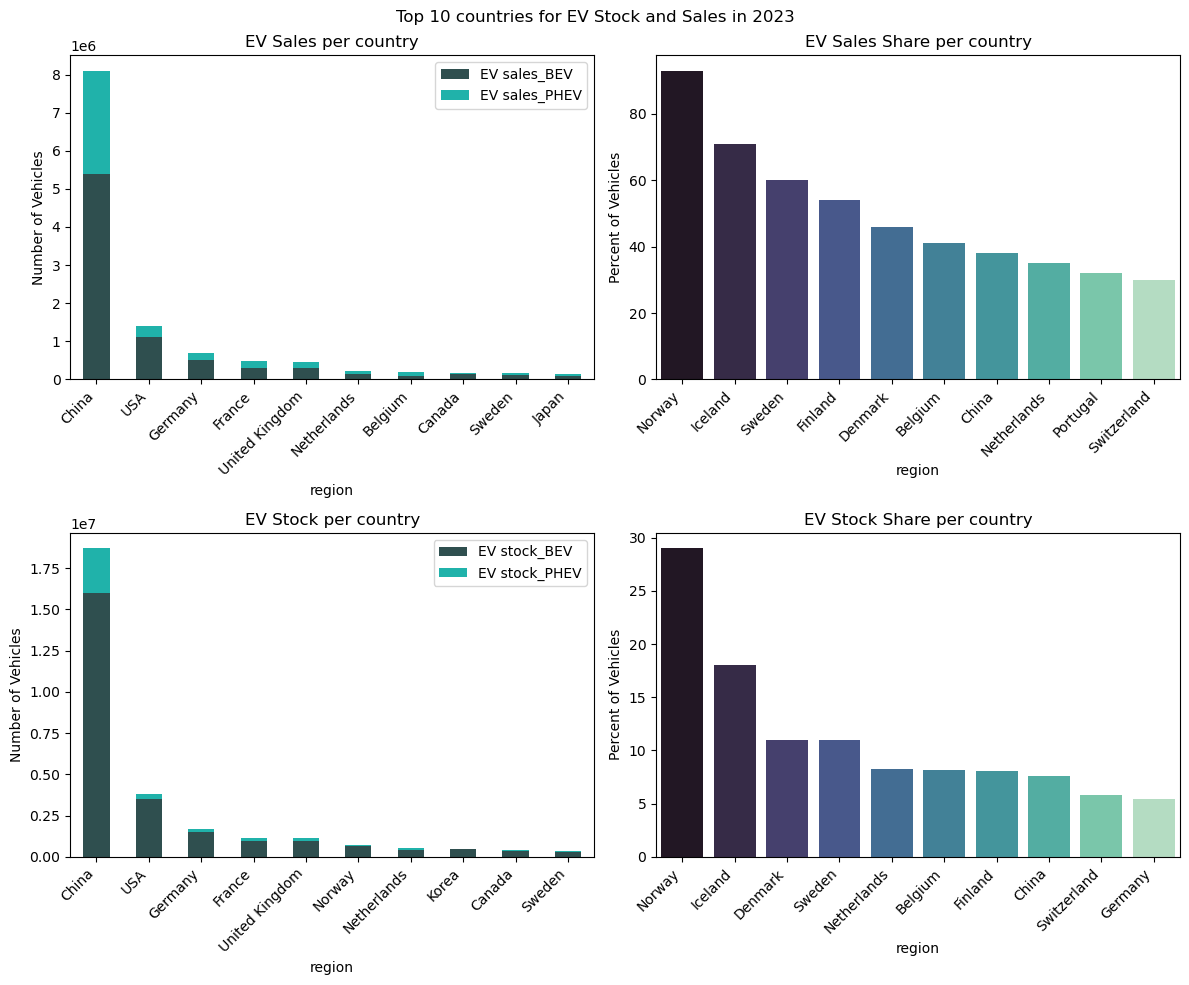

In [127]:
fig, ax= plt.subplots (2,2, figsize=(12,10))

#Top 10 countries for EV Sales in 2023
EV_cars_h_2023_sales=EV_cars_h_2023.sort_values(by='EV sales_Sum', ascending=False).head(10)
EV_cars_h_2023_sales[['region','EV sales_BEV', 'EV sales_PHEV']].plot(kind='bar',ax=ax[0,0],  x='region', stacked=True, color=['darkslategrey', 'lightseagreen'])
ax[0,0].set_title('EV Sales per country')
ax[0,0].set_ylabel('Number of Vehicles')
ax[0,0].set_xticks(ax[0,0].get_xticks(), ax[0,0].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Sales Share in 2023
EV_cars_h_2023_sales_share=EV_cars_h_2023.sort_values(by='EV sales share_EV', ascending=False).head(10)
x='region'
y='EV sales share_EV'
sns.barplot(EV_cars_h_2023_sales_share.head(10),  x=x, y=y, hue=x, ax=ax[0,1], palette='mako')
ax[0,1].set_title('EV Sales Share per country')
ax[0,1].set_ylabel('Percent of Vehicles')
ax[0,1].set_xticks(ax[0,1].get_xticks(), ax[0,1].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Stock in 2023
EV_cars_h_2023_stock=EV_cars_h_2023.sort_values(by='EV stock_Sum', ascending=False).head(10)
EV_cars_h_2023_stock[['region','EV stock_BEV', 'EV stock_PHEV']].head(10).plot(kind='bar',ax=ax[1,0],  x='region', stacked=True, color=['darkslategrey', 'lightseagreen'])
ax[1,0].set_title('EV Stock per country')
ax[1,0].set_ylabel('Number of Vehicles')
ax[1,0].set_xticks(ax[1,0].get_xticks(), ax[1,0].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Stock Share in 2023
EV_cars_h_2023_stock_share=EV_cars_h_2023.sort_values(by='EV stock share_EV', ascending=False).head(10)
x='region'
y='EV stock share_EV'
sns.barplot(EV_cars_h_2023_stock_share.head(10),  x=x, y=y, hue=x, ax=ax[1,1], palette='mako')
ax[1,1].set_title('EV Stock Share per country')
ax[1,1].set_ylabel('Percent of Vehicles')
ax[1,1].set_xticks(ax[1,1].get_xticks(), ax[1,1].get_xticklabels(), rotation=45, ha='right')

fig.suptitle ('Top 10 countries for EV Stock and Sales in 2023')
plt.tight_layout()
plt.show()

In 2023, China remains the largest market for electric car sales, which aligns with its status as the most populous country in the world. Following China, the United States and Germany also show significant electric vehicle (EV) sales. The EV stock in 2023 mirrors the sales distribution, with a similar ratio of Plug-in Hybrid Electric Vehicles (PHEVs) to Battery Electric Vehicles (BEVs) across all countries. However, compared to EV Sales there is a lower share of PHEVs. PHEVs seem to get more attractive.

The Scandinavian countries, particularly Norway, exhibit exceptionally high sales and stock shares of electric cars. Norway leads with a 93% sales share and a 29% stock share. This trend is likely influenced by political measures and a strong environmental awareness among the population. Further investigation is needed to fully understand these dynamics.

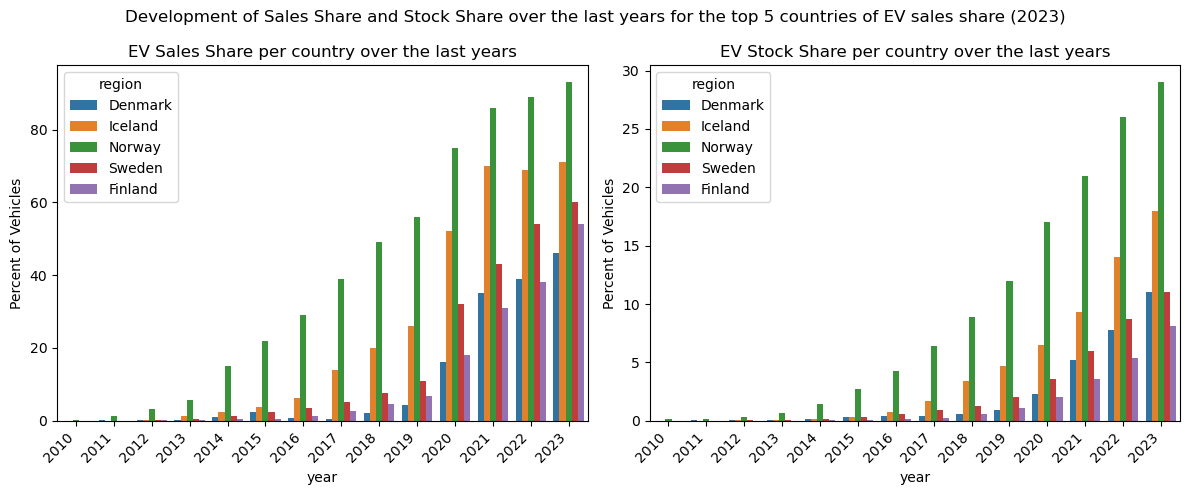

In [129]:
# Development of Sales Share and Stock Share over the last years for the top 5 countries of EV sales share (2023)
fig, ax= plt.subplots(1,2, figsize=(12,5))
top_5_countries=EV_cars_h_2023_sales_share['region'].head().to_list()

sns.barplot(data=EV_cars_h_filtered[EV_cars_h_filtered['region'].isin(top_5_countries)], x='year', y='EV sales share_EV', hue='region', ax=ax[0])#, palette='mako')
ax[0].set_title('EV Sales Share per country over the last years')
ax[0].set_ylabel('Percent of Vehicles')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(data=EV_cars_h_filtered[EV_cars_h_filtered['region'].isin(top_5_countries)], x='year', y='EV stock share_EV', hue='region', ax=ax[1])#, palette='mako')
ax[1].set_title('EV Stock Share per country over the last years')
ax[1].set_ylabel('Percent of Vehicles')
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=45, ha='right')

fig.suptitle ('Development of Sales Share and Stock Share over the last years for the top 5 countries of EV sales share (2023)')
plt.tight_layout()
plt.show()

The top 5 countries of EV sales Share (2023) show a similar development over the years. Norway is leading the sales share and the stock share for all years. Like discussed above, it needs to be further investigated, why these countries are leading in EV Sales and how this could be used to increase the EV Sales in other countries.

In [131]:
EV_cars_h_2023[['EV stock share_EV', 'EV sales share_EV']].describe()

,EV stock share_EV,EV sales share_EV
count,32.000000,32.000000
mean,4.731281,23.068750
std,6.058955,22.461859
min,0.044000,0.290000
25%,0.787500,7.575000
50%,2.600000,14.000000
75%,6.250000,32.750000
max,29.000000,93.000000


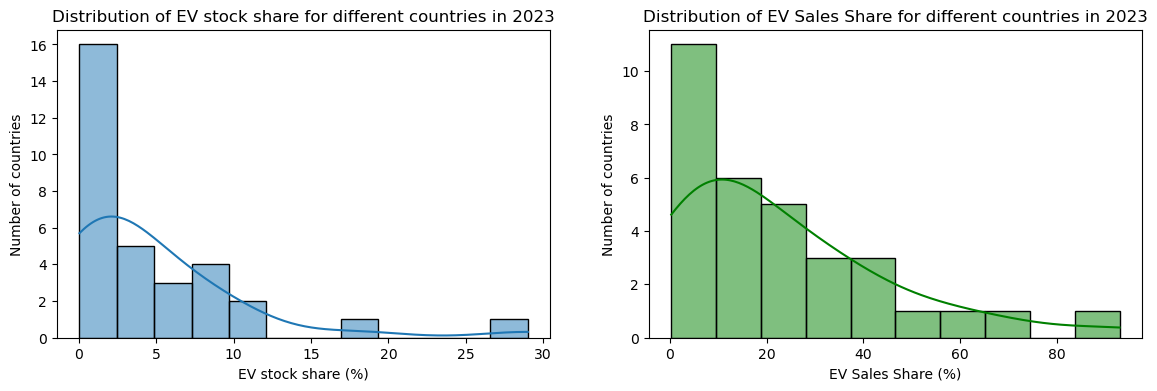

In [132]:
fig, ax= plt.subplots (1,2, figsize=(14,4))
sns.histplot(EV_cars_h_2023['EV stock share_EV'], ax=ax[0], bins=12, kde=True)
ax[0].set_title('Distribution of EV stock share for different countries in 2023')
ax[0].set_ylabel('Number of countries')
ax[0].set_xlabel('EV stock share (%)')

sns.histplot(EV_cars_h_2023['EV sales share_EV'], ax=ax[1], bins=10, kde=True, color='green')
ax[1].set_title('Distribution of EV Sales Share for different countries in 2023')
ax[1].set_ylabel('Number of countries')
ax[1].set_xlabel('EV Sales Share (%)')
plt.show()

The distribution of the EV cars stock is skewed to the right, as most countries have a low share of electric vehicles, with only a few countries having a high share. The most common share of electric cars (mode) falls within the 0 to 5% range. Notably, Norway and Iceland are exceptions with significantly higher stock shares.
Similarly, the distribution of EV car sales shares is also skewed to the right, with the most common share of electric vehicle sales (mode) ranging from 0 to 10%. Norway stands out as an upward outlier in this category as well.
The positive factors influencing the electric vehicle market in Norway warrant further investigation to understand their impact better.

**3.4 Development of EV Car sales and stock for different regions since 2010**

In [135]:
EV_cars_h_filtered

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
0,Australia,2011,49.0,0.0,0.0065,49.0,0.0,0.00039,49.0,49.0
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240,250.0,300.0
2,Australia,2013,190.0,100.0,0.0340,410.0,100.0,0.00460,290.0,510.0
3,Australia,2014,370.0,950.0,0.1600,780.0,950.0,0.01400,1320.0,1730.0
4,Australia,2015,760.0,1000.0,0.2000,1500.0,1000.0,0.02700,1760.0,2500.0
...,...,...,...,...,...,...,...,...,...,...
607,World,2019,1500000.0,580000.0,2.6000,4800000.0,580000.0,0.60000,2080000.0,5380000.0
608,World,2020,2000000.0,980000.0,4.2000,6800000.0,980000.0,0.84000,2980000.0,7780000.0
609,World,2021,4700000.0,1900000.0,8.9000,11000000.0,1900000.0,1.30000,6600000.0,12900000.0
610,World,2022,7300000.0,2900000.0,14.0000,18000000.0,2900000.0,2.10000,10200000.0,20900000.0


In [136]:
# EV Cars in USA, Europe and China
include_regions=['USA', 'Europe', 'China'] 
EV_cars_h_USA_Europe_China=EV_cars_h_filtered[EV_cars_h_filtered.region.isin(include_regions)]

#Definition of other countries as all countries beside 'include regions', use Definition of Europe from Data Dictionary
other_regions=['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'India', 'Indonesia', 'Israel', 'Japan','Korea', 'Mexico','New Zealand', 'Rest of the world', 'Seychelles', 'South Africa', 'Thailand', 'Turkiye', 'United Arab Emirates']
EV_cars_h_included_regions=EV_cars_h_filtered[EV_cars_h_filtered.region.isin(other_regions)]
EV_cars_h_other_countries_sales_stock=EV_cars_h_included_regions[['region', 'year', 'EV sales_BEV', 'EV sales_PHEV', 'EV stock_BEV', 'EV stock_PHEV', 'EV sales_Sum', 'EV stock_Sum']].groupby('year').sum()
EV_cars_h_other_countries_sales_stock['region']='Other regions'
EV_cars_h_other_countries_sales_share_stock_share=EV_cars_h_included_regions[['year', 'EV sales share_EV', 'EV stock share_EV']].groupby('year').mean()
EV_cars_h_other_countries=pd.concat([EV_cars_h_other_countries_sales_stock, EV_cars_h_other_countries_sales_share_stock_share], axis=1)
EV_cars_h_other_countries=EV_cars_h_other_countries.reset_index()

# Concat both dfs:
EV_cars_h_regions=pd.concat([EV_cars_h_USA_Europe_China, EV_cars_h_other_countries])
EV_cars_h_regions=EV_cars_h_regions.reset_index(drop=True)
EV_cars_h_regions.tail()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
51,Other regions,2019,105710.0,54013.0,0.943308,339190.0,54013.0,0.209385,159723.0,393203.0
52,Other regions,2020,112392.0,53972.0,1.076000,473590.0,53972.0,0.282462,166364.0,527562.0
53,Other regions,2021,230190.0,111621.0,2.275231,702980.0,111621.0,0.457846,341811.0,814601.0
54,Other regions,2022,466280.0,127303.0,4.202308,1152100.0,127303.0,0.742462,593583.0,1279403.0
55,Other regions,2023,781220.0,208950.0,6.761538,1919300.0,208950.0,1.177000,990170.0,2128250.0


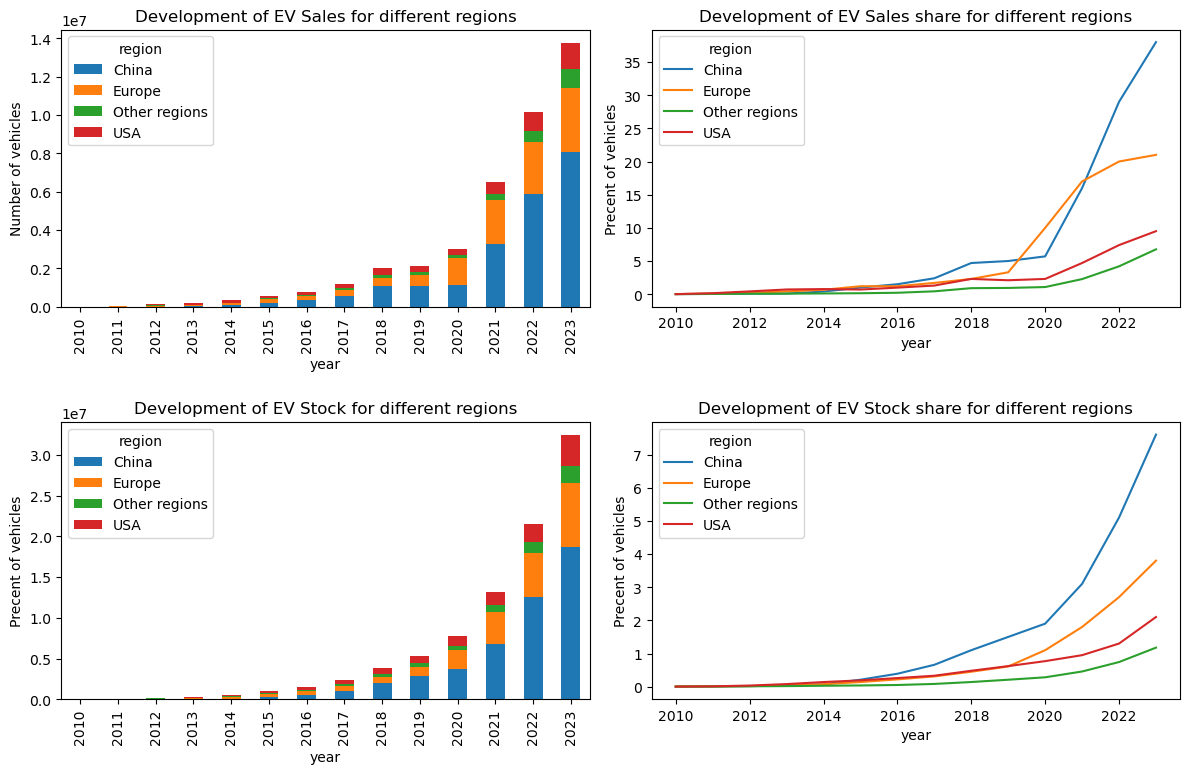

In [137]:
fig, ax= plt.subplots (2,2, figsize=(12,8))

EV_cars_h_regions_sales=EV_cars_h_regions[['region', 'year','EV sales_Sum']].pivot_table(index=['year'], columns='region', values='EV sales_Sum')
EV_cars_h_regions_sales.plot(kind='bar', ax=ax[0,0], stacked=True)
ax[0,0].set_title('Development of EV Sales for different regions')
ax[0,0].set_ylabel('Number of vehicles')

EV_cars_h_regions_sales_share=EV_cars_h_regions[['region', 'year','EV sales share_EV']].pivot_table(index=['year'], columns='region', values='EV sales share_EV')
EV_cars_h_regions_sales_share.plot(kind='line', ax=ax[0,1])
ax[0,1].set_title('Development of EV Sales share for different regions')
ax[0,1].set_ylabel('Precent of vehicles')

EV_cars_h_regions_stock=EV_cars_h_regions[['region', 'year','EV stock_Sum']].pivot_table(index=['year'], columns='region', values='EV stock_Sum')
EV_cars_h_regions_stock.plot(kind='bar', ax=ax[1,0], stacked=True)
ax[1,0].set_title('Development of EV Stock for different regions')
ax[1,0].set_ylabel('Precent of vehicles')

EV_cars_h_regions_stock_share=EV_cars_h_regions[['region', 'year','EV stock share_EV']].pivot_table(index=['year'], columns='region', values='EV stock share_EV')
EV_cars_h_regions_stock_share.plot(kind='line', ax=ax[1,1])
ax[1,1].set_title('Development of EV Stock share for different regions')
ax[1,1].set_ylabel('Precent of vehicles')
plt.tight_layout()
plt.show()

Over the years, China has played the most significant role in the total number of electric cars. It is followed by Europe and the USA, while other countries and regions play a more subordinate role. China has also the highest EV Stock share, followed by Europe and USA. China has established itself as the leading market for electric cars, mainly due to massive government subsidies and tax breaks that make the purchase of electric cars attractive. The government is promoting electric mobility to reduce air pollution. Low prices and extensive investment in charging infrastructure are also contributing to the high uptake of electric vehicles. Together, these factors make China the world's largest market for electric vehicles. [8]
Like shown in Chapter 3.4 Europe has some countries with the highest sales and stock share. However, the mean value over all european countries is not that high.

**3.5 Correlation between Charging points, EV Car Stock and Sales**

In [140]:
# Create DataFrame with Columns of each parameter (EV stock, EV sales,..) and powertrain (BEV and PHEV) for BEV & PHEV Cars
EV_h_charging_points=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['parameter']=='EV charging points')]

# Pivottable for historical Charging Points
EV_h_charging_points_pivot=EV_h_charging_points.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_h_charging_points_pivot.columns = ["_".join(pair) for pair in EV_h_charging_points_pivot.columns]
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='category_')
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='mode_')
EV_h_charging_points_pivot=EV_h_charging_points_pivot.rename(columns= {'year_': 'year', 'region_':'region'})
EV_h_charging_points_pivot.head()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow
0,Australia,2017,40.0,440.0
1,Australia,2018,61.0,670.0
2,Australia,2019,NaN,1700.0
3,Australia,2020,NaN,2300.0
4,Australia,2021,320.0,2000.0


In [141]:
# no countries with a column without any values for all years
countries_with_charging_column_without_values = EV_h_charging_points_pivot.groupby('region')[['EV charging points_Publicly available fast','EV charging points_Publicly available slow']].apply(lambda x: x.isnull().all())
countries_missing_charging_values = countries_with_charging_column_without_values[countries_with_charging_column_without_values[['EV charging points_Publicly available fast','EV charging points_Publicly available slow']].any(axis=1)].index.tolist()
print(countries_missing_charging_values)

[]


In [142]:
# The missing values are distributed over the years
EV_h_charging_points_pivot.groupby('year')[['EV charging points_Publicly available fast','EV charging points_Publicly available slow']].apply(lambda x: x.isnull().sum())

,EV charging points_Publicly available fast,EV charging points_Publicly available slow
year,,
2010,5,1
2011,3,1
2012,2,1
2013,3,2
2014,2,2
2015,2,1
2016,1,1
2017,0,1
2018,0,0


In [143]:
# Fill NaN with values from the year before: assuming that there were no changes in the number of charging points
EV_h_charging_points_pivot = EV_h_charging_points_pivot.sort_values(by=['region', 'year'])
EV_h_charging_points_pivot['EV charging points_Publicly available fast'] = EV_h_charging_points_pivot.groupby('region')['EV charging points_Publicly available fast'].ffill()
EV_h_charging_points_pivot['EV charging points_Publicly available slow'] = EV_h_charging_points_pivot.groupby('region')['EV charging points_Publicly available slow'].ffill()
EV_h_charging_points_pivot.head()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow
0,Australia,2017,40.0,440.0
1,Australia,2018,61.0,670.0
2,Australia,2019,61.0,1700.0
3,Australia,2020,61.0,2300.0
4,Australia,2021,320.0,2000.0


In [144]:
# fill the rest of NaN in the first years with zeros
EV_h_charging_points_pivot.loc[:, 'EV charging points_Publicly available fast'] = EV_h_charging_points_pivot['EV charging points_Publicly available fast'].fillna(0)
EV_h_charging_points_pivot.loc[:, 'EV charging points_Publicly available slow'] = EV_h_charging_points_pivot['EV charging points_Publicly available slow'].fillna(0)

In [350]:
#Adding the summary of charging points
EV_h_charging_points_pivot['EV charging points_sum']=EV_h_charging_points_pivot[['EV charging points_Publicly available fast', 'EV charging points_Publicly available slow']].sum(axis=1)
EV_h_charging_points_pivot

# merge charging points and EV_cars_h_filtered 
EV_cars_charge_h=pd.merge(EV_cars_h_filtered, EV_h_charging_points_pivot, how='inner', left_on=['year', 'region'], right_on = ['year', 'region'])
EV_cars_charge_h.head(20)


,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum
0,Australia,2017,1200.0,1100.0,0.26,3400.0,1100.0,0.052,2300.0,4500.0,40.0,440.0,480.0
1,Australia,2018,1800.0,1800.0,0.42,5200.0,1800.0,0.077,3600.0,7000.0,61.0,670.0,731.0
2,Australia,2019,6300.0,2900.0,1.20,12000.0,2900.0,0.140,9200.0,14900.0,61.0,1700.0,1761.0
3,Australia,2020,5200.0,1700.0,1.10,17000.0,1700.0,0.180,6900.0,18700.0,61.0,2300.0,2361.0
4,Australia,2021,17000.0,3400.0,2.80,34000.0,3400.0,0.320,20400.0,37400.0,320.0,2000.0,2320.0
5,Australia,2022,33000.0,5900.0,5.10,67000.0,5900.0,0.590,38900.0,72900.0,470.0,2100.0,2570.0
6,Australia,2023,87000.0,11000.0,12.00,150000.0,11000.0,1.200,98000.0,161000.0,660.0,2100.0,2760.0
7,Austria,2011,0.0,0.0,0.00,990.0,0.0,0.022,0.0,990.0,0.1,0.1,0.2
8,Austria,2012,0.0,0.0,0.00,1400.0,0.0,0.033,0.0,1400.0,0.1,0.1,0.2
9,Austria,2013,650.0,0.0,0.20,2100.0,0.0,0.053,650.0,2100.0,0.1,0.1,0.2


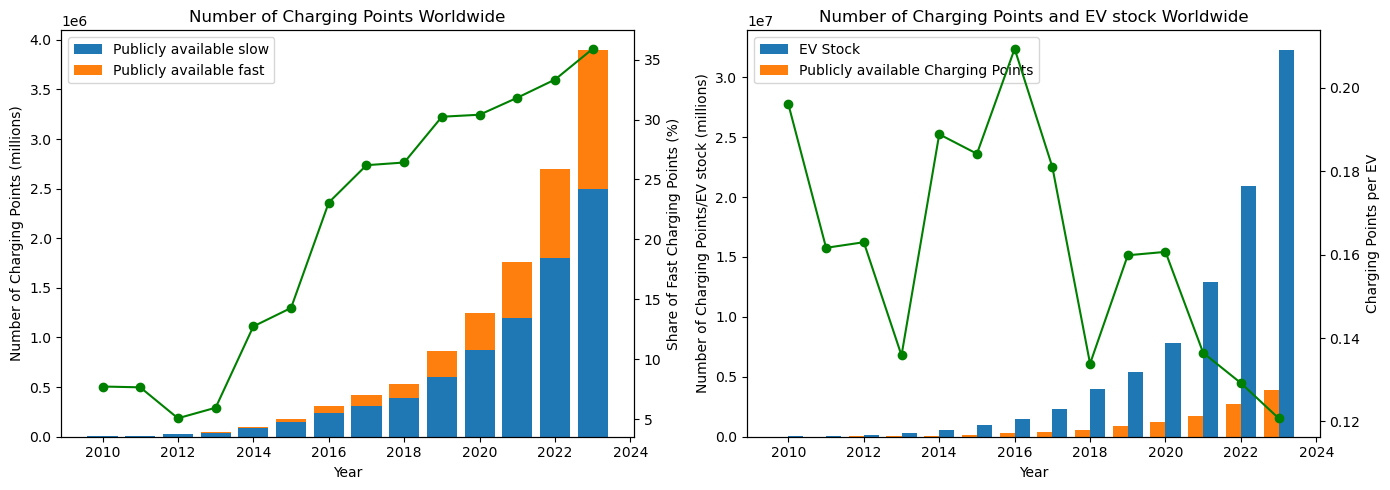

In [352]:
EV_cars_charge_h['share of fast charging points']=EV_cars_charge_h['EV charging points_Publicly available fast']/(EV_cars_charge_h['EV charging points_Publicly available fast'] + EV_cars_charge_h['EV charging points_Publicly available slow'])*100
EV_cars_charge_h['Charging Points per EV']=np.where(EV_cars_charge_h['EV stock_Sum']!=0,EV_cars_charge_h['EV charging points_sum']/EV_cars_charge_h['EV stock_Sum'], np.nan)
EV_cars_charge_h_gl=EV_cars_charge_h[EV_cars_charge_h['region']=='World']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
width = 0.4
#
ax1.bar(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['EV charging points_Publicly available slow'], label='Publicly available slow')
ax1.bar(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['EV charging points_Publicly available fast'], label='Publicly available fast', bottom=EV_cars_charge_h_gl['EV charging points_Publicly available slow'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Charging Points (millions)')
ax1.set_title('Number of Charging Points Worldwide')
ax1.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.plot(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['share of fast charging points'], label='Share of Fast Charging Points', color='green', marker='o')
ax3.set_ylabel('Share of Fast Charging Points (%)')

ax2.bar(EV_cars_charge_h_gl['year'] + width/2, EV_cars_charge_h_gl['EV stock_Sum'], width=width, label='EV Stock')
ax2.bar(EV_cars_charge_h_gl['year'] - width/2, EV_cars_charge_h_gl['EV charging points_sum'], width=width, label='Publicly available Charging Points')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Charging Points/EV stock (millions)')
ax2.set_title('Number of Charging Points and EV stock Worldwide')
ax2.legend(loc='upper left')

ax4 = ax2.twinx()
ax4.plot(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['Charging Points per EV'], label='Charging Points per EV', color='green', marker='o')
ax4.set_ylabel('Charging Points per EV')

plt.tight_layout()
plt.show()

The number of publicly available charging points worldwide is steadily increasing, driven by the rising demand that accompanies the growing stock of electric vehicles (EVs). Additionally, the proportion of fast charging points is also on the rise, likely due to advancements in battery technology and the charging process over the years. This positive trend could make electric cars more attractive due to shorter charging times. There

Over time, the number of charging points per battery electric vehicle (BEV) has decreased. Initially, extensive area coverage with charging stations is required, leading to a high number of charging stations per EV. However, as the number of EVs increases, this ratio was adjusted 2014-2016 and 2019-2020. Since then the ratio decreased again. The key questions remain: how many private charging stations exist, and are customers satisfied with the overall coverage of charging stations?

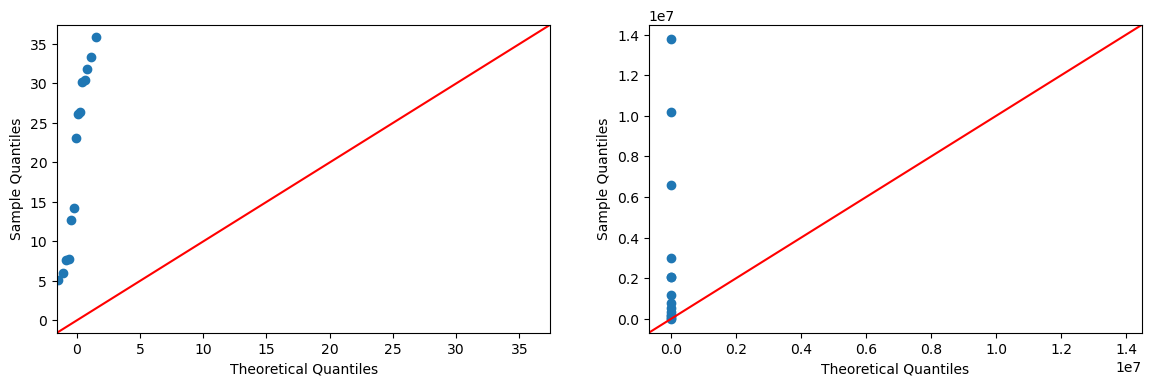

In [368]:
# not normal distribution, but monotonous -> use spearmen method for correlation
fig, ax= plt.subplots (1,2, figsize=(14,4))
sm.qqplot(EV_cars_charge_h_gl['share of fast charging points'], line ='45', ax=ax[0])
sm.qqplot(EV_cars_charge_h_gl['EV sales_Sum'], line ='45', ax=ax[1])
plt.show()

In [395]:
print(f' There ist a strong positive correlation between EV Sales and Share of fast charging points (corr = {EV_cars_charge_h_gl['EV sales_Sum'].corr(EV_cars_charge_h_gl['share of fast charging points'], method='spearman').round(2)}).')

 There ist a strong positive correlation between EV Sales and Share of fast charging points (corr = 0.96).


In [393]:
print(f' There ist a moderate negative correlation between EV Sales and Charging Points per EV (corr = {EV_cars_charge_h_gl['EV sales_Sum'].corr(EV_cars_charge_h_gl['Charging Points per EV'], method='spearman').round(2)}).')

 There ist a moderate negative correlation between EV Sales and Charging Points per EV (corr = -0.65).


In [354]:
# EV Cars in USA, Europe and China
EV_h_charging_points_USA_Europe_China =EV_h_charging_points_pivot[EV_h_charging_points_pivot.region.isin(include_regions)]

#Definition of other countries as all countries beside 'include regions', use Definition of Europe from Data Dictionary
EV_h_charging_points_included_regions=EV_h_charging_points_pivot[EV_h_charging_points_pivot.region.isin(other_regions)]
EV_h_charging_points_included_regions=EV_h_charging_points_included_regions[['region', 'year', 'EV charging points_Publicly available fast', 'EV charging points_Publicly available slow', 'EV charging points_sum']].groupby('year').sum()
EV_h_charging_points_included_regions['region']='Other regions'
EV_h_charging_points_other_regions=EV_h_charging_points_included_regions.reset_index()
EV_h_charging_points_other_regions

# Concat both dfs:
EV_charging_h_regions=pd.concat([EV_h_charging_points_USA_Europe_China, EV_h_charging_points_other_regions])
EV_charging_h_regions=EV_charging_h_regions.reset_index(drop=True)
EV_charging_h_regions.tail()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum
47,Other regions,2019,16978.0,72620.1,89598.1
48,Other regions,2020,21617.0,77110.1,98727.1
49,Other regions,2021,28323.0,133834.1,162157.1
50,Other regions,2022,40160.9,239060.0,279220.9
51,Other regions,2023,44000.9,253140.0,297140.9


In [360]:
# merge charging points and EV_cars_h_filtered 
EV_cars_charge_h_regions=pd.merge(EV_cars_h_regions, EV_charging_h_regions, how='inner', left_on=['year', 'region'], right_on = ['year', 'region'])
EV_cars_charge_h_regions

EV_cars_charge_h_regions['share of fast charging points']=EV_cars_charge_h_regions['EV charging points_Publicly available fast']/(EV_cars_charge_h_regions['EV charging points_Publicly available fast'] + EV_cars_charge_h_regions['EV charging points_Publicly available slow'])*100
EV_cars_charge_h_regions['Charging Points per EV']=np.where(EV_cars_charge_h_regions['EV stock_Sum']!=0,EV_cars_charge_h_regions['EV charging points_sum']/EV_cars_charge_h_regions['EV stock_Sum'], np.nan)
EV_cars_charge_h_regions.tail()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum,share of fast charging points,Charging Points per EV
47,Other regions,2019,105710.0,54013.0,0.943308,339190.0,54013.0,0.209385,159723.0,393203.0,16978.0,72620.1,89598.1,18.949063,0.227867
48,Other regions,2020,112392.0,53972.0,1.076000,473590.0,53972.0,0.282462,166364.0,527562.0,21617.0,77110.1,98727.1,21.895710,0.187138
49,Other regions,2021,230190.0,111621.0,2.275231,702980.0,111621.0,0.457846,341811.0,814601.0,28323.0,133834.1,162157.1,17.466395,0.199063
50,Other regions,2022,466280.0,127303.0,4.202308,1152100.0,127303.0,0.742462,593583.0,1279403.0,40160.9,239060.0,279220.9,14.383200,0.218243
51,Other regions,2023,781220.0,208950.0,6.761538,1919300.0,208950.0,1.177000,990170.0,2128250.0,44000.9,253140.0,297140.9,14.808093,0.139617


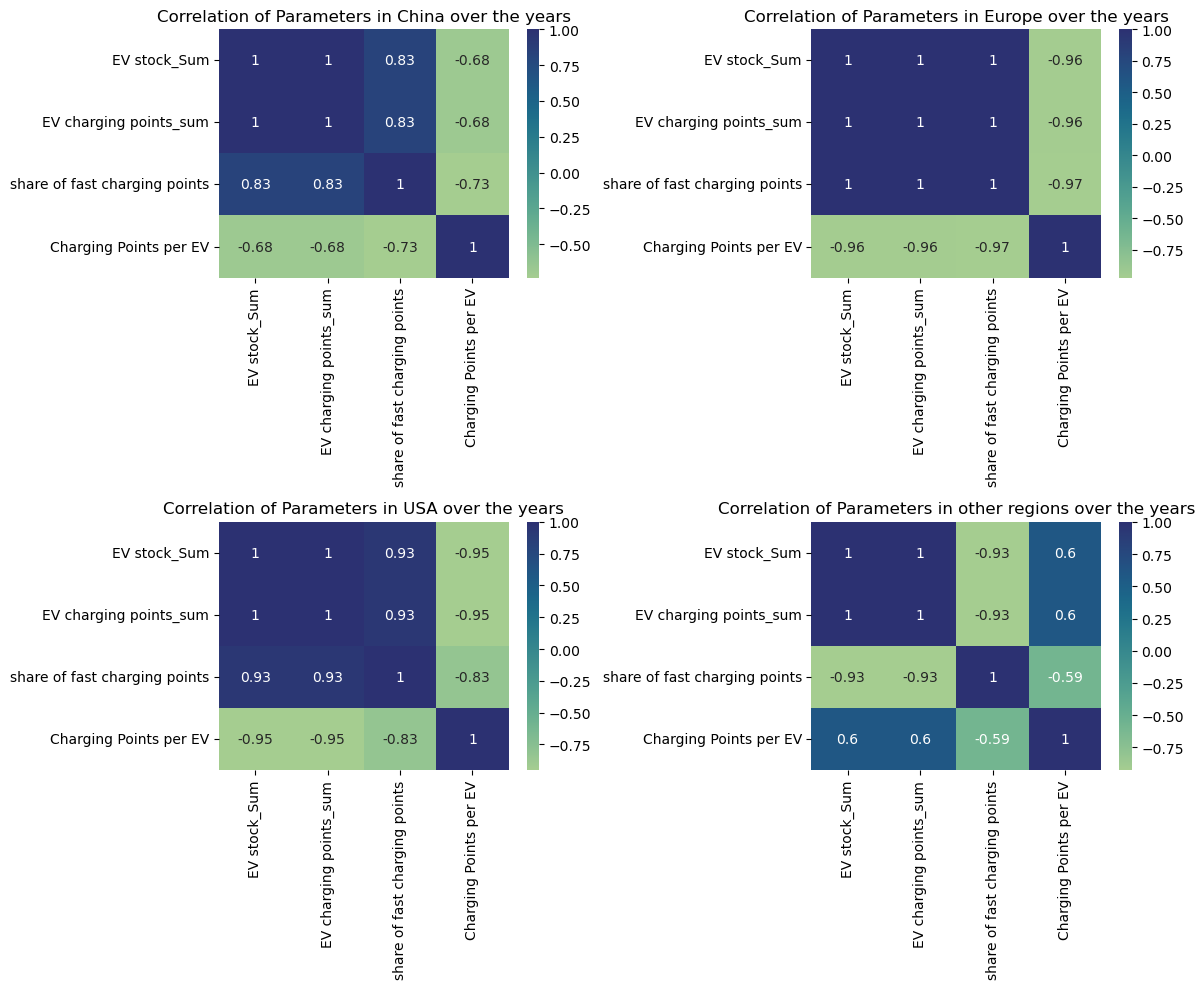

In [449]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
EV_cars_charge_China=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='China']
EV_cars_charge_Europe=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='Europe']
EV_cars_charge_USA=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='USA']
EV_cars_charge_other_regions=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='Other regions']

EV_cars_charge_China_corr=EV_cars_charge_China[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_China_corr, annot=True, cmap="crest", ax=ax[0,0])
ax[0,0].set_title('Correlation of Parameters in China over the years')

EV_cars_charge_Europe_corr=EV_cars_charge_Europe[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_Europe_corr, annot=True, cmap="crest", ax=ax[0,1])
ax[0,1].set_title('Correlation of Parameters in Europe over the years')

EV_cars_charge_USA_corr=EV_cars_charge_USA[['EV stock_Sum','EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_USA_corr, annot=True, cmap="crest", ax=ax[1,0])
ax[1,0].set_title('Correlation of Parameters in USA over the years')

EV_cars_charge_other_regions_corr=EV_cars_charge_other_regions[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_other_regions_corr, annot=True, cmap="crest", ax=ax[1,1])
ax[1,1].set_title('Correlation of Parameters in other regions over the years')

plt.tight_layout()
plt.show()

As expected, there is a strong positive correlation between EV stock and number of charging points for all regions. 
China, Europe and USA show a similar strong positive correlation for Share of fast charging points and EV stock. China, Europe and USA show a negative correlation for Charging Points per EV and EV Sales Stock. For Europe and USA it is even a strong begative correlation. As the number of EVs increases, the ratio does not adjust. The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build [10]
The heatmap looks different for the Rest of the World. Here there is a moderate positive correlation between Charging points per EV and EV stock. As discussed above, a large area coverage with charging points is needed initially and the EV stock of the Rest of the world is way smaller compared to USA, China and Europe. There is a strong negative correlation of share of fast charging points and EV stock. It could be that more slow charging stations are build, because they are less expensive and it is easier to build a Charging infrastructure network in the beginning. [10]

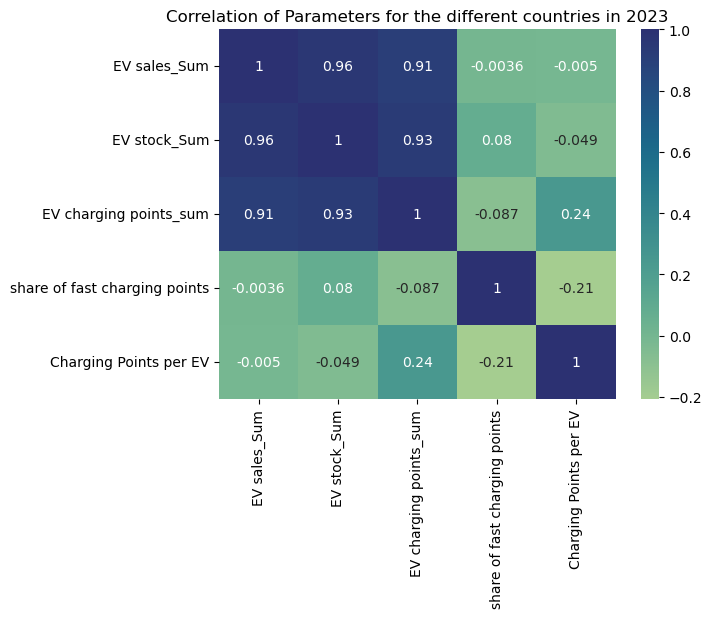

In [441]:
# development of Charging Points in different countries
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_charge_h_countries=EV_cars_charge_h[~EV_cars_charge_h.region.isin(exclude_regions)]

# Charging points correlation for different regions in 2023
EV_cars_charge_h_countries_2023 = EV_cars_charge_h_countries[EV_cars_charge_h_countries['year']==2023]
EV_cars_charge_h_countries_2023_corr=EV_cars_charge_h_countries_2023[['EV sales_Sum','EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_h_countries_2023_corr, annot=True, cmap="crest")
plt.title('Correlation of Parameters for the different countries in 2023')
plt.show()

Comparing different countries in 2023, there is a strong positive correlation between EV stock, sales and number of charging points.
There is a weak negative correlation between charging points per EV and EV stock and sales (share). As discussed above, a large area coverage with charging points is needed initially. As the number of EVs increases, the ratio does not adjust.
There is no significant correlation between the share of fast charging points and EV sales and stock (share). Contrary to expectations, a higher share of fast charging stations does not significantly increase EV sales. This could be because people prefer to charge their cars at home. [9] 
The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build [10]

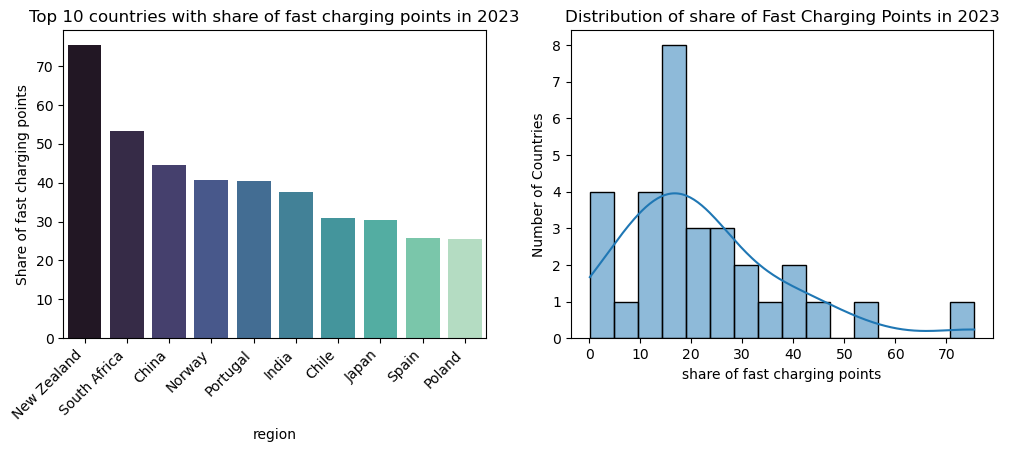

In [154]:
EV_cars_charge_h_2023=EV_cars_charge_h_countries[EV_cars_charge_h_countries['year']==2023]

fig, ax= plt.subplots (1,2, figsize=(12,4))
x='region'
y1='share of fast charging points'

EV_cars_charge_h_2023_sorted_fc=EV_cars_charge_h_2023.sort_values(by='share of fast charging points', ascending=False)
sns.barplot(EV_cars_charge_h_2023_sorted_fc.head(10), x=x, y=y1, hue=x, palette='mako', ax=ax[0])
ax[0].set_title('Top 10 countries with share of fast charging points in 2023')
ax[0].set_ylabel('Share of fast charging points')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.histplot(EV_cars_charge_h_2023['share of fast charging points'] ,ax=ax[1], bins=16, kde=True)
ax[1].set_title('Distribution of share of Fast Charging Points in 2023')
ax[1].set_ylabel('Number of Countries')
ax[1].set_xlabel('share of fast charging points')
plt.show()

The distribution of the share of fast charging points is skewed to the right, as most countries have a low share of fast charging points and only a few countries have a high share. The most common share of electric cars (mode) is in the 15-20% range. Notably, New Zealand is an exception with a significantly higher share of fast charging points (75%). However, New Zealand has a low share of EV stock (2.8%). As discussed above, there is no significant correlation between EV stock/sales and the share of publicly available fast charging points.

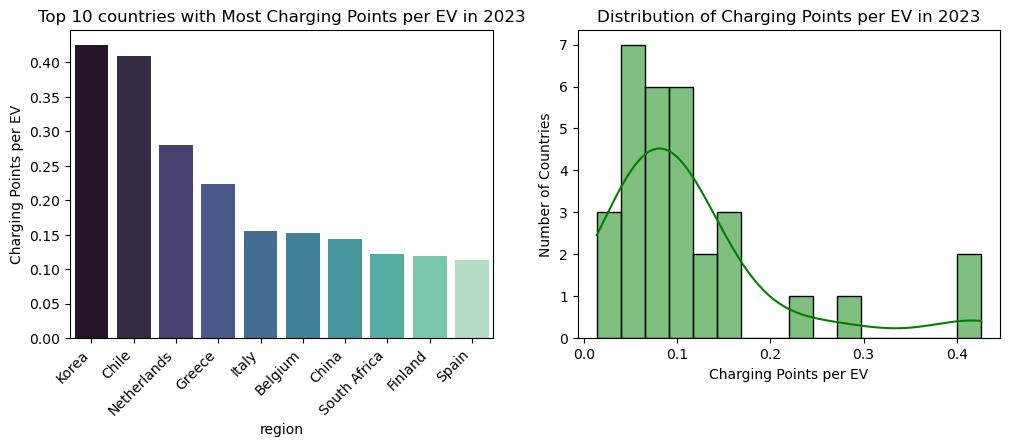

In [156]:
fig, ax= plt.subplots (1,2, figsize=(12,4))
x='region'
y2='Charging Points per EV'

EV_cars_charge_h_2023_sorted_per_EV=EV_cars_charge_h_2023.sort_values(by='Charging Points per EV', ascending=False)
sns.barplot(EV_cars_charge_h_2023_sorted_per_EV.head(10),  x=x, y=y2, hue=x, ax=ax[0], palette='mako')
ax[0].set_title('Top 10 countries with Most Charging Points per EV in 2023')
ax[0].set_ylabel('Charging Points per EV')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.histplot(EV_cars_charge_h_2023['Charging Points per EV'],ax=ax[1], color='green', bins=16, kde=True)
ax[1].set_title('Distribution of Charging Points per EV in 2023')
ax[1].set_ylabel('Number of Countries')
ax[1].set_xlabel('Charging Points per EV')
plt.show()

The distribution of the Charging Points per EV is skewed to the right, as most countries have a low ratio of Charging pints per EV, with only a few countries having a high share. The most common share of electric cars (mode) falls around 0.9. Notably, Korea and Chile are exceptions with a significantly higher ratio (> 0.4).
However, Korea and Chile have a low EV stock share (2.4 and 0.1%). Like discussed above there is a weak negative correlation between charging points per EV and EV stock/sales (share).

## 4. Conclusion and Outlook

**4.1 Conclusion**

The results are displayed as a Power BI Dashboard ('electromobility_dashboard.pbix') and are included in this Chapter as pictures of the Dashboard.

In [461]:
# Exporting Data for Excel Assignment and Power Bi Dashboard
#with pd.ExcelWriter("Electromoblity.xlsx") as writer:
#    EV_sales_h_gl.to_excel(writer, sheet_name="EV_sales_global", index=False)
#    EV_sales_share_h_gl.to_excel(writer, sheet_name="EV_sales_share_global", index=False)
#    EV_stock_h_gl.to_excel(writer, sheet_name="EV_stock_global", index=False)
#    EV_stock_share_h_gl.to_excel(writer, sheet_name="EV_stock_share_global", index=False)
#    EV_cars_h_filtered_countries.to_excel(writer, sheet_name="Cars_countries", index=False)
#    EV_cars_h_regions.to_excel(writer, sheet_name="Cars_regions", index=False)
#    EV_cars_charge_h_gl.to_excel(writer, sheet_name="Charge_global", index=False)
#    EV_cars_charge_h_countries.to_excel(writer, sheet_name="Charge_countries", index=False)
#    EV_cars_charge_h_countries_2023_corr.to_excel(writer, sheet_name="Charge_countries_2023_corr", index=True)

![Picture of Power BI: Development_of_Electromobility_Worldwide](Development_of_Electromobility_Worldwide.png "Development of Electromobility Worldwide")

Around 14.4 million EVs were sold in 2023, resulting in an EV stock of around 42.4 million. This EV stock consists mainly of cars. Commercial vehicles such as buses, trucks and vans play a minor role. This is to be expected, as passenger cars account for the largest share of the global vehicle market. [6] Most electric vehicles are fully electric vehicles (BEVs), while plug-in hybrid electric vehicles (PHEVs) only play a significant role in passenger cars. It may be that the lower demand for commercial EVs results in a limited variety of models and powertrain options. Another possible reason is the influence of subsidies. This needs to be investigated further. However, PHEVs offer few climate or air quality benefits because there is no guarantee that they will be driven electrically. [4]
In 2023, the stock share of all vehicles shows that buses have the highest share of electrified vehicles, followed by cars. 
Green public transport is important in the fight against climate change. Differences in absolute numbers are due to the fact that fewer buses are needed than cars. Electrification of vans and trucks seems to be less attractive. This raises the question of why it is not attractive enough. It could be that the range is not sufficient, or the infrastructure is not good enough, or other needs are not being met. [7]
More research is needed on how to increase the share of EVs.

![Picture of Power BI: Development_of_Electromobility_Countries](Development_of_Electromobility_Countries.png "Development of Electromobility Countries")

Over the years, China has played the most significant role in the total number of electric cars. It is followed by Europe and the USA, while other countries and regions play a more subordinate role. China has also the highest EV Stock share, followed by Europe and USA. China has established itself as the leading market for electric cars, mainly due to massive government subsidies and tax breaks that make the purchase of electric cars attractive. The government is promoting electric mobility to reduce air pollution. Low prices and extensive investment in charging infrastructure are also contributing to the high uptake of electric vehicles. Together, these factors make China the world's largest market for electric vehicles. [8]

Looking at countries within Europe individually, the Scandinavian countries, particularly Norway, exhibit exceptionally high sales and stock shares of electric cars. Norway leads with a 93% sales share and a 29% stock share. This trend is likely influenced by political measures and a strong environmental awareness among the population. Further investigation is needed to fully understand these dynamics.

![Picture of Power BI: Development_of_Charging_Points](Development_of_Charging_Points.png "Development of Charging Points")

The number of publicly available charging points worldwide is steadily increasing, driven by the rising demand that accompanies the growing stock of electric vehicles (EVs). Additionally, the proportion of fast charging points is also on the rise, likely due to advancements in battery technology and the charging process over the years. This positive trend could make electric cars more attractive due to shorter charging times.
Over time, the number of charging points per battery electric vehicle (BEV) has decreased. Initially, extensive area coverage with charging stations is required, leading to a high number of charging stations per EV. However, as the number of EVs increases, this ratio was adjusted 2014-2016 and 2019-2020. Since then the ratio decreased again. The key questions remain: how many private charging stations exist, and are customers satisfied with the overall coverage of charging stations?
As expected, there is a strong positive correlation between EV stock (share), sales (share) and number of charging points.
There is a weak negative correlation between charging points per EV and EV stock and sales (share). As discussed above, a large area coverage with charging points is needed initially. As the number of EVs increases, the ratio does not adjust.
There is no significant correlation between the share of fast charging points and EV sales and stock (share). Contrary to expectations, a higher share of fast charging stations does not significantly increase EV sales. This could be because people prefer to charge their cars at home. [9] 
The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build [10]

**4.2 Outlook & Next steps**

Thie data analysis project could give a overview of the development of the EV Sales, Stock and Charging Points for different reagions over the last years. There is further investigation needed. Following Questions should be analysed as a next step.
- How do subsidues influence the Sales of EV Sales? Is there a difference in how efficient subsidues are?
- What are the needs ot the customers? Are they met? How to increase the Sales of EVs?
- Take a look at the forecasts? Will the CO2 reduction goals be met?
- Which manufacturers are market leaders? Are there differences between combustion and electric cars? What is the used battery technology of the market leader? How are the prices for the EVS distributed?
- How is the distribution of privately used Charging Stations split between fast charging and normal charging?

## References:

[1] https://commission.europa.eu/strategy-and-policy/priorities-2019-2024/european-green-deal/delivering-european-green-deal_en

[2] https://commission.europa.eu/strategy-and-policy/priorities-2019-2024/european-green-deal/delivering-european-green-deal_ens 

[3] https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#overview

[4] https://www.transportenvironment.org/articles/plug-in-hybrids-2-0-still-not-a-solution-for-the-climate

[5] https://afdc.energy.gov/vehicles/fuel-cell

[6] https://www.statista.com/statistics/265902/worldwide-commercial-vehicle-sales/

[7] https://www.digital-engineering-magazin.de/elektrische-nutzfahrzeuge-kommerzielle-flotten-richtig-elektrifizieren-a-ca4cf3737990710210022f246b6cbdff/

[8] https://www.zdf.de/nachrichten/wirtschaft/china-elektro-e-auto-mobilitaet-100.html

[9] https://de.statista.com/statistik/daten/studie/1409304/umfrage/ladeorte-von-e-auto-fahrern/

[10] https://emobicon.de/ladeinfrastruktur-was-kostet-der-betrieb-einer-oeffentlichen-ladestation/

## Zusatzmaterial

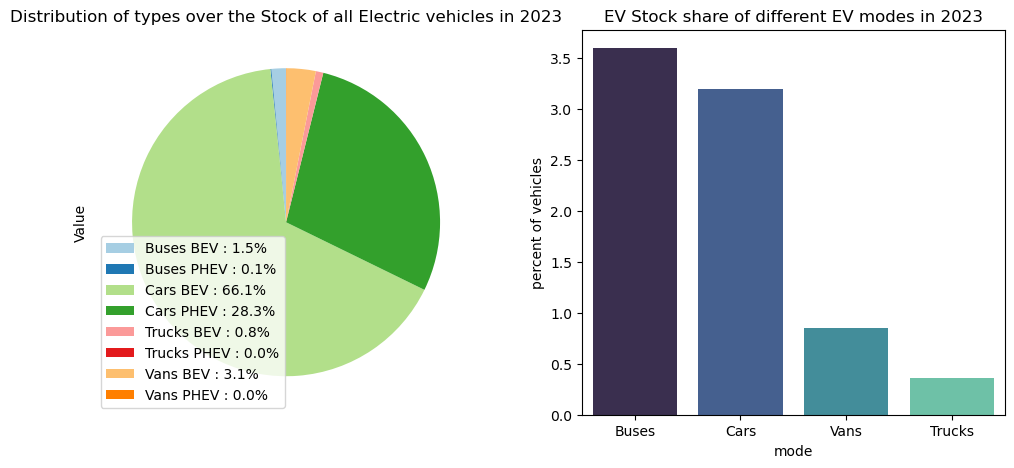

In [172]:
EV_stock_2023_mode_pivot_transposed_melted=EV_stock_2023_mode_pivot_transposed.reset_index().melt(id_vars=['powertrain'], var_name='mode', value_name='Value')
EV_stock_2023_mode_pivot_transposed_melted['EV type']= EV_stock_2023_mode_pivot_transposed_melted['mode'] + ' ' + EV_stock_2023_mode_pivot_transposed_melted['powertrain']
EV_stock_2023_comparison=EV_stock_2023_mode_pivot_transposed_melted[EV_stock_2023_mode_pivot_transposed_melted['powertrain']!='FCEV'][['EV type', 'Value']]
EV_stock_2023_comparison.set_index('EV type', inplace=True)
EV_stock_2023_comparison['percent']=(EV_stock_2023_comparison['Value']/EV_stock_2023_comparison['Value'].sum()*100).round(1)
EV_stock_2023_comparison['label']=EV_stock_2023_comparison.index.astype(str) + ' : ' + EV_stock_2023_comparison['percent'].astype(str) + '%'

fig, ax= plt.subplots (1,2, figsize=(12,5))

palette_color = sns.color_palette('Paired') 
EV_stock_2023_comparison.plot(kind='pie', startangle=90, y='Value', ax=ax[0], labels=None, pctdistance=1.2, legend= False, colors=palette_color)
ax[0].set_title('Distribution of types over the Stock of all Electric vehicles in 2023')
ax[0].legend(EV_stock_2023_comparison['label'], loc='best')

data=EV_stock_share_h_gl[EV_stock_share_h_gl['year']==2023].sort_values(by='percent of vehicles', ascending=False)
x='mode'
y='percent of vehicles'
sns.barplot(data=data, x=x, y=y, hue=x, ax=ax[1], palette='mako')
ax[1].set_title('EV Stock share of different EV modes in 2023')

plt.show()

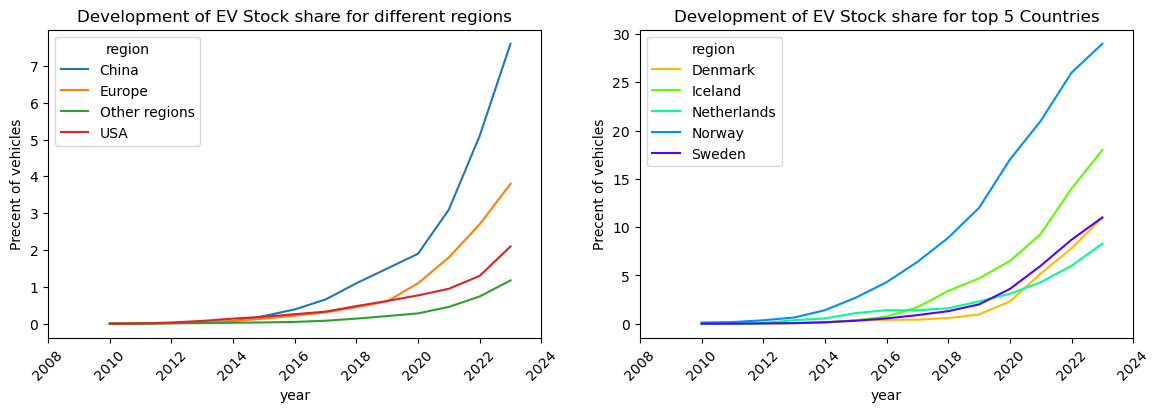

In [173]:
fig, ax= plt.subplots (1,2, figsize=(14,4))
color1=sns.color_palette(palette='tab10')

EV_cars_h_regions_stock_share.plot(kind='line', ax=ax[0])
ax[0].set_title('Development of EV Stock share for different regions')
ax[0].set_ylabel('Precent of vehicles')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45)

top5_countries=EV_cars_h_2023_stock_share['region'].head().to_list()
EV_cars_h_top5_stock_share=EV_cars_h_filtered[EV_cars_h_filtered['region'].isin(top5_countries)][['region', 'year', 'EV stock share_EV']]
x='year'
y='EV stock share_EV'
sns.lineplot(data=EV_cars_h_top5_stock_share, x=x, y=y, hue='region', ax=ax[1], palette='gist_rainbow')
ax[1].set_title('Development of EV Stock share for top 5 Countries')
ax[1].set_ylabel('Precent of vehicles')
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=45)

plt.show()

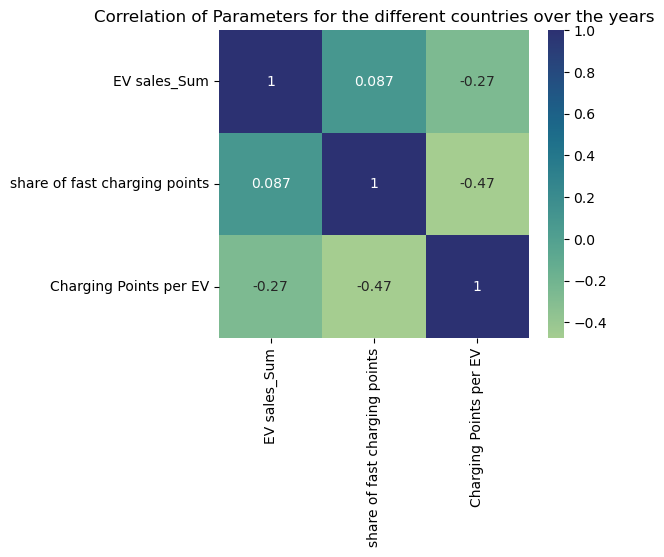

In [174]:
# Charging points correlation for different regions
EV_cars_h_countries_corr=EV_cars_charge_h_countries[['EV sales_Sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
plt.figure(figsize=(5,4))
sns.heatmap(EV_cars_h_countries_corr, annot=True, cmap="crest")
plt.title('Correlation of Parameters for the different countries over the years')
plt.show()